# HTTP Requests

In [3]:
import requests

In [21]:
# valid link
response = requests.get('https://example.com')
print(response)
print(response.status_code)
print(response.reason)

<Response [200]>
200
OK


In [22]:
# invalid link
# valid link
response404 = requests.get('https://does_not_exist.com/')
print(response404.status_code)
print(response404.reason)

ConnectionError: HTTPSConnectionPool(host='does_not_exist.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f09ea763110>: Failed to resolve 'does_not_exist.com' ([Errno -2] Name or service not known)"))

In [ ]:
## Response Content

In [24]:
response = requests.get('https://example.com')
print(response.content)

b'<!doctype html><html lang="en"><head><title>Example Domain</title><meta name="viewport" content="width=device-width, initial-scale=1"><style>body{background:#eee;width:60vw;margin:15vh auto;font-family:system-ui,sans-serif}h1{font-size:1.5em}div{opacity:0.8}a:link,a:visited{color:#348}</style><body><div><h1>Example Domain</h1><p>This domain is for use in documentation examples without needing permission. Avoid use in operations.<p><a href="https://iana.org/domains/example">Learn more</a></div></body></html>\n'


In [27]:
from collections import defaultdict

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from collections import defaultdict

# Plot styling
plt.style.use("ggplot")  # sets the color scheme of the plots
fig = plt.figure(figsize=(8, 6))  # sets the size of the window
ax = plt.gca()  # gets the current axis. this is the axis that we will plot on
ax.set(xlabel='Year', ylabel='Energy [TJ]')  # sets the labels of the axis

# Download the data
energy_data_dict = defaultdict(list)

for year in range(1980, 2023):
    response = requests.get("https://opendata.example.swiss/en/energy_balance?year=" + str(year))

    response_data = response.json()  # pull the data from the response
    for column in response_data:
        l1 = energy_data_dict[column]      # data that is already in the dict
        l2 = response_data[column]  # data that we just got from the website
        energy_data_dict[column] = l1 + l2  # merge the two lists and put them back into the dict


# convert dict to dataframe
energy_data = pd.DataFrame.from_dict(energy_data_dict)

# -----------------------------------------------------------------------------------------------
print(energy_data)
print(energy_data.info())


# -----------

print(energy_data['Category'].unique())


# 
print(energy_data["Year"].unique())


#
print(energy_data["TJ"].describe())


## get data
#import_data = energy_data[energy_data['Category'] == 'Import'].copy()
#print(import_data)
#electricity_import_data = import_data[import_data['EnergyCarrier'] == 'Electricity'].copy()

electricity_import_data = energy_data.query("Category == 'Import' & EnergyCarrier == 'Electricity' ").copy()

# prepare
electricity_import_data["GWh"] = electricity_import_data["TJ"] / 3.6

# diplay
print(electricity_import_data.head())
print(electricity_import_data.shape)
print(electricity_import_data.info())
print("\nCategory values:")
print(electricity_import_data["Category"].unique())
print("\nEnergyCarrier values:")
print(electricity_import_data["EnergyCarrier"].unique())
#print(electricity_import_data.sort_values(by=['TJ'], ascending=False)


# plot
electricity_import_data.plot(x='Year', y='GWh', ax=ax, label='Electricity import')
plt.savefig('cx_out/electricity_import.png')
ax.set_title('Switzerland: Electricity import')
ax.set_ylabel('Electricity [GWh]')
plt.tight_layout()import pandas as pd
import matplotlib.pyplot as plt
import requests
from collections import defaultdict

plt.style.use("ggplot")  # sets the color scheme of the plots
fig = plt.figure(figsize=(8, 6))  # sets the size of the window
ax = plt.gca()  # gets the current axis. this is the axis that we will plot on
ax.set(xlabel='Year', ylabel='Energy [TJ]')  # sets the labels of the axis

energy_data_dict = defaultdict(list)

for year in range(1980, 2023):
    response = requests.get("https://opendata.example.swiss/en/energy_balance?year=" + str(year))

    response_data = response.json()  # pull the data from the response
    for column in response_data:
        l1 = energy_data_dict[column]      # data that is already in the dict
        l2 = response_data[column]  # data that we just got from the website
        energy_data_dict[column] = l1 + l2  # merge the two lists and put them back into the dict

energy_data = pd.DataFrame.from_dict(energy_data_dict)

# -----------------------------------------------------------------------------------------------
# Start writing code here


#electricity_import_data = energy_data[(energy_data['Category'] == 'Import') & (energy_data['EnergyCarrier'] == 'Electricity')]

#recent_electricity_import_data = electricity_import_data[electricity_import_data['Year'] >= 2010]
#print(recent_electricity_import_data)


# plot
import_data = energy_data[energy_data['Category'] == 'Import']
import_data.plot(x='Year', y='TJ', ax=ax, label='Import')
ax.set_title('Switzerland: All imports')
plt.tight_layout()
plt.savefig('cx_out/all_imports.png')


##
import_data = energy_data[energy_data['Category'] == 'Import']
pivot_data = import_data.pivot(index='Year', columns='EnergyCarrier', values='TJ')
pivot_data.plot(ax=ax)
ax.set_title('Switzerland: Energy imports')
plt.tight_layout()
plt.savefig('cx_out/all_imports_pivot.png')

ConnectionError: HTTPSConnectionPool(host='opendata.example.swiss', port=443): Max retries exceeded with url: /en/energy_balance?year=1980 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f09cc9cbc50>: Failed to resolve 'opendata.example.swiss' ([Errno -2] Name or service not known)"))

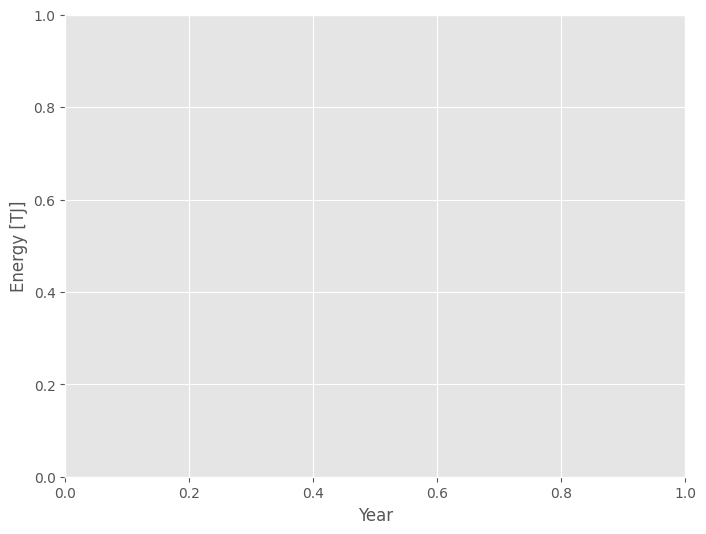

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from collections import defaultdict

plt.style.use("ggplot")  # sets the color scheme of the plots
fig = plt.figure(figsize=(8, 6))  # sets the size of the window
ax = plt.gca()  # gets the current axis. this is the axis that we will plot on
ax.set(xlabel='Year', ylabel='Energy [TJ]')  # sets the labels of the axis

energy_data_dict = defaultdict(list)

for year in range(1980, 2023):
    response = requests.get("https://opendata.example.swiss/en/energy_balance?year=" + str(year))

    response_data = response.json()  # pull the data from the response
    for column in response_data:
        l1 = energy_data_dict[column]      # data that is already in the dict
        l2 = response_data[column]  # data that we just got from the website
        energy_data_dict[column] = l1 + l2  # merge the two lists and put them back into the dict

energy_data = pd.DataFrame.from_dict(energy_data_dict)

# -----------------------------------------------------------------------------------------------
# Start writing code here


#electricity_import_data = energy_data[(energy_data['Category'] == 'Import') & (energy_data['EnergyCarrier'] == 'Electricity')]

#recent_electricity_import_data = electricity_import_data[electricity_import_data['Year'] >= 2010]
#print(recent_electricity_import_data)


# plot
import_data = energy_data[energy_data['Category'] == 'Import']
import_data.plot(x='Year', y='TJ', ax=ax, label='Import')
ax.set_title('Switzerland: All imports')
plt.tight_layout()
plt.savefig('cx_out/all_imports.png')


##
import_data = energy_data[energy_data['Category'] == 'Import']
pivot_data = import_data.pivot(index='Year', columns='EnergyCarrier', values='TJ')
pivot_data.plot(ax=ax)
ax.set_title('Switzerland: Energy imports')
plt.tight_layout()
plt.savefig('cx_out/all_imports_pivot.png')

ConnectionError: HTTPSConnectionPool(host='opendata.example.swiss', port=443): Max retries exceeded with url: /en/energy_balance?year=1980 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f09ca5a0b90>: Failed to resolve 'opendata.example.swiss' ([Errno -2] Name or service not known)"))

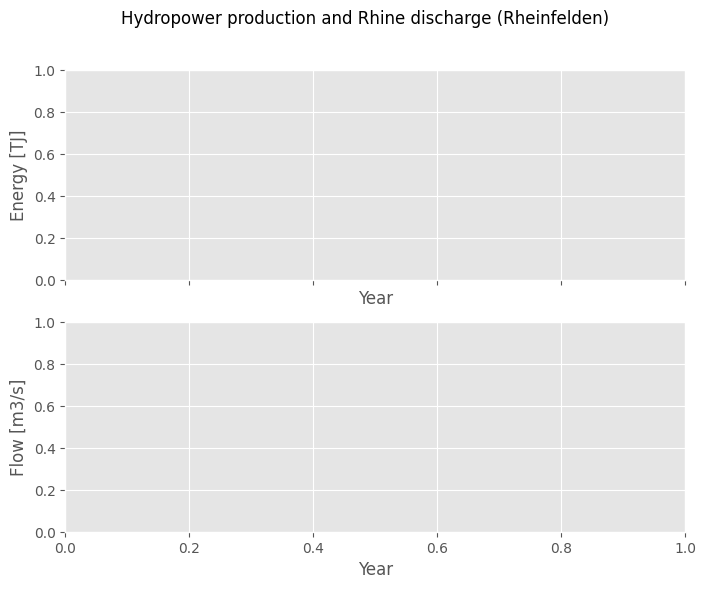

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from collections import defaultdict

plt.style.use("ggplot")  # sets the color scheme of the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # sets the size of the window
ax1.set(xlabel='Year', ylabel='Energy [TJ]')  # sets the labels of the axis
ax2.set(xlabel='Year', ylabel='Flow [m3/s]')  # sets the labels of the axis
fig.suptitle("Hydropower production and Rhine discharge (Rheinfelden)")

energy_data_dict = defaultdict(list)

for year in range(1980, 2023):
    response = requests.get("https://opendata.example.swiss/en/energy_balance?year=" + str(year))
    response_data = response.json()         # pull the data from the response
    for column in response_data:
        l1 = energy_data_dict[column]       # data that is already in the dict
        l2 = response_data[column]          # data that we just got from the website
        energy_data_dict[column] = l1 + l2  # merge the two lists and put them back into the dict

energy_data = pd.DataFrame.from_dict(energy_data_dict)

# # ----------------------------------------
# Write your code here

rhine_data = pd.read_csv("db_data/rhine_flow.csv", sep=";")
print(rhine_data)
print(rhine_data.info())
print(rhine_data.describe())

# prepare
rhine_data["Year"] = pd.DatetimeIndex(rhine_data["Timestamp"]).year
rhine_data = rhine_data.drop(columns=["Timestamp", "StationName", "StationNumber"])
rhine_data = rhine_data.groupby(["Year"]).mean().reset_index()

# filter
hydropower_data = energy_data[(energy_data["EnergyCarrier"] == "Hydropower") & (energy_data["Category"] == "Domestic production")]
print(hydropower_data)

# plot
hydropower_data.plot(ax=ax1, x="Year", y="TJ", label="Hydro power production")
rhine_data.plot(ax=ax2, x="Year", y="Value", label="Rhine flow (Rheinfelden)")

plt.tight_layout()
plt.savefig("cx_out/rhine_hydro.png")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from collections import defaultdict

plt.style.use("ggplot")  # sets the color scheme of the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # sets the size of the window
ax1.set(xlabel='Year', ylabel='Energy [TJ]')  # sets the labels of the axis
ax2.set(xlabel='Year', ylabel='Flow [m3/s]')  # sets the labels of the axis
fig.suptitle("Hydropower production and Rhine discharge (Rheinfelden)")

energy_data_dict = defaultdict(list)

for year in range(1980, 2023):
    URL = "https://data.nasa.gov/resource/gh4g-9sfh.json"

response = requests.get(URL)year=" + str(year))
    response_data = response.json()         # pull the data from the response
    for column in response_data:
        l1 = energy_data_dict[column]       # data that is already in the dict
        l2 = response_data[column]          # data that we just got from the website
        energy_data_dict[column] = l1 + l2  # merge the two lists and put them back into the dict

energy_data = pd.DataFrame.from_dict(energy_data_dict)

# # ----------------------------------------
# Write your code here

rhine_data = pd.read_csv("db_data/rhine_flow.csv", sep=";")
print(rhine_data)
print(rhine_data.info())
print(rhine_data.describe())

# prepare
rhine_data["Year"] = pd.DatetimeIndex(rhine_data["Timestamp"]).year
rhine_data = rhine_data.drop(columns=["Timestamp", "StationName", "StationNumber"])
rhine_data = rhine_data.groupby(["Year"]).mean().reset_index()

# filter
hydropower_data = energy_data[(energy_data["EnergyCarrier"] == "Hydropower") & (energy_data["Category"] == "Domestic production")]
print(hydropower_data.head())
#print("\nColumns:")
#print(hydropower_data.columns)
# plot
hydropower_data.plot(ax=ax1, x="Year", y="TJ", label="Hydro power production")
rhine_data.plot(ax=ax2, x="Year", y="Value", label="Rhine flow (Rheinfelden)")

plt.tight_layout()
plt.savefig("cx_out/rhine_hydro.png")
